In [1]:
import matplotlib.pyplot as plt
import healpy as hp
import sys
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2
from echolens import simulation

In [3]:
cmbmap = simulation.CMBlensed()
noisemap = simulation.GaussianNoiseMap()

In [4]:
tqu_signal = cmbmap.get_lensed_TQU(0)
tqu_noise = noisemap.noiseTQU()

alm2lenmap: using 8 nthreads
  build angles <- synthesis (GRAD_ONLY):  [0:00:01.988069] (38.4%)  
  build angles <- th-phi-gm (ducc)     :  [0:00:00.059357] (1.1%)  
  build_angles                         :  [0:00:02.047439] (39.5%)  
  synthesis general (STANDARD)         :  [0:00:00.790813] (15.3%)  
  gclm2lenmap                          :  [0:00:05.170929] (99.8%)  
  synthesis general (GRAD_ONLY)        :  [0:00:02.318148] (44.7%)  
  polrot (ducc)                        :  [0:00:00.014495] (0.3%)  
  Total                                :  [0:00:05.183458] d:h:m:s:mus


In [5]:
cmbspectra = simulation.CMBspectra()
noisespec = simulation.NoiseSpectra()

In [6]:
cl_len = cmbspectra.get_lensed_spectra(dl=False)
cl_nt = noisespec.noise_T()
cl_np = noisespec.noise_P()

In [7]:
tlm,elm,blm = hp.map2alm(tqu_signal, lmax=3072)

In [11]:
which = 0
tlm_n,elm_n,blm_n = hp.map2alm(tqu_noise[which], lmax=3072)

(1e-06, 10000.0)

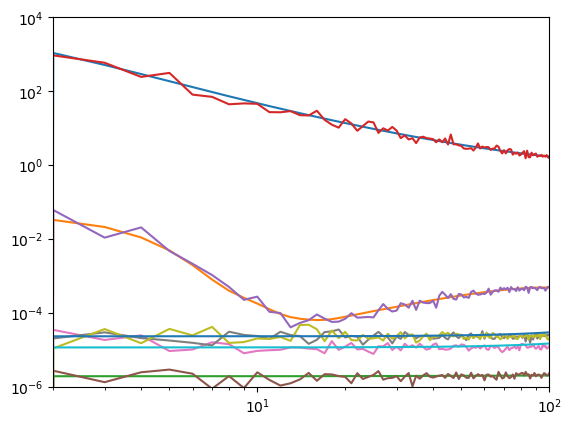

In [15]:
plt.loglog(cl_len['tt'], label='TT(theory)')
plt.loglog(cl_len['ee'], label='EE(theory)')
plt.loglog(cl_len['bb'], label='BB(theory)')
plt.loglog(hp.alm2cl(tlm), label='TT')
plt.loglog(hp.alm2cl(elm), label='EE')
plt.loglog(hp.alm2cl(blm), label='BB')
plt.loglog(hp.alm2cl(tlm_n), label='TT noise')
plt.loglog(hp.alm2cl(elm_n), label='EE noise')
plt.loglog(hp.alm2cl(blm_n), label='BB noise')
plt.loglog(cl_nt[which], label='TT noise(theory)')
plt.loglog(cl_np[which], label='EE noise(theory)')
plt.xlim(2, 100)
plt.ylim(1e-6, 1e4)